# CMSE 201 Final Project Example A
### &#9989; CMSE Student
### &#9989; Section_001
#### &#9989; April 15th, 2021

# Analyzing the Most Influential Factors in Democratic Primary Election Success

## 1 Background and Motivation

Over the course of American history, elections have never been simple creatures, and over the past few decades, the process has only become more complicated. Between the rise of the 24-hour news cycle, increasing polarization between political parties and a slew of other political influences, elections have been growing increasingly closer (1) and winners are becoming less predictable to the average voter. This means that it is becoming increasingly more important (And increasingly more difficult) for political parties to field potential candidates to appeal to voters. Because of this, the primary election cycle has become a vital part of party decisions, but also a natural experiment of what candidates are more likely to appease their party. Through this, we will attempt to answer the question: _what are the most important factors of a successful Democratic primary candidate?_

This question has been on the mind of political analysts and committee leaders since the beginning of the election experiment, so this will be a simplified break down of a much larger political quandary. The focus of this study is only Democratic primary candidates running for Congress in 2018. However, using data from the 2018 primary election cycle (2), we can begin to see patterns among more successful candidates and those that fail to advance. In doing so, we will control for two important factors known to influence primary success, the first of which is party affiliation. The two main American political parties have vastly different values, so it makes sense that they field different candidates who experience different versions of success. We will only use Democratic candidates for this study, as they tend to field a greater range of candidates and to control for party influence. The other factor we will control for is a phenomenon called the incumbancy effect, where it is known that incumbents have a significant advantage when running for re-election. To account for this, we will only be using the data of challengers as they tend to have equal opportunity against each other in the face of an incumbent competitor.

Within the greater question of what factors are better-suited for primary election success, we can answer several smaller inquiries in order to understand the causes behind some patterns. We can separate candidates by which type of seat they are trying for, namely a Senate seat or a House of Representatives seat, to determine if different factors are more beneficial to one office or the other. Once we create a rgression to test for significance of factors, we can then attempt to create a combination of factors best-suited for a candidate to achieve election success.

## 2 Methodology

### 2.1 Separating Data

In order to proceed, we need to do some basic data cleaning, the majority of which can be done as the data exists in a CSV file. That way, we can combine the dataset containing most of the candidates' information (2) and with the financial data taken from the FEC (3). Any  missing data was found via Ballotpedia (3) and inserted into the data frame. The result is the data frame `allreps` which we will break down into `sen`, which contains the data for those running for a Senate position, and `rep`, which contains all of the data of those running for a House seat. Within each of those data sets, each variable will be adjusted to be displayed as an integer. The categorical variables (such as race, veteran status, etc.) will be dummy variables, represented as a 0 or 1 for a yes/no value. They variables can be better understood with this key:

-_Primary%_: The percent of the vote won by the candidate in the primary election

-_Partisan Lean_: the average difference between how the district votes and how the country votes. Higher absolute values are districts that are more likely to elect one party over the other and since we are only working with Democratic candidates, negative values represent Republican-dominated districts.

-_Race_: 0 represents a non-Hispanic white candidate, 1 represents a candidate of color

-_Veteran_: 0 represents a candidate with no military history, 1 represents a candidate who has served

-_LGBTQ_: 0 represents a candidate who does not identify with the LBGTQ community, 1 represents a candidate who advertises that they are a member of the LGBTQ community

-_Past Service_: 0 represents a candidate that has never held office before, 1 represents a candidate who has held any political office in the past

-_Funds_:The amount of money (in thousands) a candidate raised as declared to the FEC.

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as statsm
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(5678)

In [3]:
#Data imports
allreps = pd.read_csv("allreps.csv", delimiter = ",")
for i in range(len(allreps)):
    if allreps["Race"][i] == "White":
        allreps["Race"][i] = 0
    else:
        allreps["Race"][i] = 1
    if allreps["Veteran?"][i] == "Yes":
        allreps["Veteran?"][i] = 1
    else:
        allreps["Veteran?"][i] = 0
    if allreps["LGBTQ?"][i] == "Yes":
        allreps["LGBTQ?"][i] = 1
    else:
        allreps["LGBTQ?"][i] = 0
    if allreps["Past Service"][i] == "Yes":
        allreps["Past Service"][i] = 1
    else:
        allreps["Past Service"][i] = 0
    allreps["Funds"][i] = allreps["Funds"][i]/1000

sen = allreps.loc[np.where(allreps["Office Type"] == "Senator")]
rep = allreps.loc[np.where(allreps["Office Type"] == "Representative")]
print("All Representatives:", allreps.head())

<ipython-input-3-6e0443556810>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allreps["Race"][i] = 1
<ipython-input-3-6e0443556810>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allreps["Veteran?"][i] = 0
<ipython-input-3-6e0443556810>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allreps["LGBTQ?"][i] = 0
<ipython-input-3-6e0443556810>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

All Representatives:                  Candidate State                       District  \
0  Lizzetta Hill McConnell    AL  U.S. House Alabama District 1   
1       Robert Kennedy Jr.    AL  U.S. House Alabama District 1   
2     Audri Scott Williams    AL  U.S. House Alabama District 2   
3            Tabitha Isner    AL  U.S. House Alabama District 2   
4   Adia McClellan Winfrey    AL  U.S. House Alabama District 3   

      Office Type Race Type Primary Status Won Primary Obama Alum?  Primary %  \
0  Representative   Regular           Lost          No          No  19.230000   
1  Representative   Regular       Advanced         Yes          No  80.769997   
2  Representative   Regular           Lost          No          No  39.560001   
3  Representative   Regular       Advanced         Yes          No  60.439999   
4  Representative   Regular           Lost          No          No  34.240002   

   Partisan Lean Race Veteran? LGBTQ? Past Service      Funds  
0     -30.680000    1    

### 2.2 All Representatives

In [4]:
#all_inputs = allreps.iloc[:, 9:]
all_X = np.array(allreps[["Partisan Lean", "Race", "LGBTQ?", "Veteran?", "Past Service", "Funds"]],dtype = float) #Defining independent variables
all_Y = np.array(allreps["Primary %"]) #Defining dependent variable

all_X2 = statsm.add_constant(all_X) #Add a constant so model does not start at 0
lm = statsm.OLS(all_Y, all_X2)
model = lm.fit()
print("Parameters:", model.params)
print("Coefficient of Determination:", model.rsquared)

Parameters: [ 1.59200272e+01 -3.88394558e-01  1.93755247e+00 -5.33345483e-01
 -8.68813779e-01  1.23553344e+01  3.73762325e-03]
Coefficient of Determination: 0.28324881302505


First, we'll treat candidates running for either the Senate or the House of Representatives as the same population, and create a regression for candidate qualities overall. Using the `statsmodel` package, we can create regression coefficients to model the relationship between each factor and the percent of the vote won. We will lump all of the columns containing our independent variables into one array and the dependent into another so that `fit` command can handle the input. The regression of choice is an ordinary least squares regression, which is well suited to large datasets and is unbiased so we can view each factor as equal. The output is a set of parameters (1 intercept value and 6 coefficients) that we can use for future estimates.

We can also see the coefficient of determination, which is quite low at 0.283. This is not uncommon because it is difficult to fit a regression to multiple factors but we can attempt to improve this by removing insignificant variables. For our purposes, insignificant variables are variables that do not have an impact on the candidate's winning percentage. To do this, we can look at the p_values of each coefficient. If they are above a chosen significance level (we will use $\alpha = 0.1$ as to incorporate as many coefficients while accounting for extremes), we do not have to include them in the model as they do not have a significant impact.

In [5]:
#Statistical signifiance 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     38.40
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           2.42e-39
Time:                        14:33:01   Log-Likelihood:                -2522.3
No. Observations:                 590   AIC:                             5059.
Df Residuals:                     583   BIC:                             5089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9200      1.207     13.191      0.000      13.550      18.290
x1            -0.3884      0.040     -9.721      0.000      -0.467      -0.310
x2             1.9376      1.758      1.102      0.271      -1.514       5.389
x3            -0.5333      3.334     -0.160      0.873      -7.081       6.015
x4            -0.8688      1.994     -0.436      0.663      -4.786       3.048
x5            12.3553      2.430      5.085      0.000       7.584      17.127
x6             0.0037      0.000     11.699      0.000       0.003       0.004
==============================================================================
Omnibus:                       72.521   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.795
Skew:                           0.938   Prob(JB):                     9.58e-22
Kurtosis:                       3.649   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above table, x2 (Race), x3 (LBGTQ identity), and x4 (Veteran status) all have p values greater than 0.1, so we can exclude them from our model. When we remove these values from the regression, our $R^2$ value does not really change, so we can have a much simpler model with less variables.

In [14]:
#Create OLS regression - coding suggestions taken from citation 5
all_X_fitted = np.array(allreps[["Partisan Lean", "Past Service", "Funds"]],dtype = float) #array w/out insignificant variables

all_X2_fitted = statsm.add_constant(all_X_fitted) #Add a constant so model does not start at 0
lm2 = statsm.OLS(all_Y, all_X2_fitted)
model_fitted = lm2.fit()

fitted_params = []
fitted_params.append([round(model_fitted.params[0],3), round(model_fitted.params[1],3), 0,0,0, round(model_fitted.params[2],3), round(model_fitted.params[3],3)])

print("Parameters:", model_fitted.params)
print("Coefficient of Determination:", model_fitted.rsquared)
model_fitted.summary()

Parameters: [ 1.64320042e+01 -3.75161708e-01  1.24938684e+01  3.69846378e-03]
Coefficient of Determination: 0.28152402767800777


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     76.54
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           8.75e-42
Time:                        14:34:49   Log-Likelihood:                -2523.0
No. Observations:                 590   AIC:                             5054.
Df Residuals:                     586   BIC:                             5072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4320      1.010     16.262      0.000      14.447      18.417
x1            -0.3752      0.038     -9.800      0.000      -0.450      -0.300
x2            12.4939      2.423      5.156      0.000       7.735      17.253
x3             0.0037      0.000     11.657      0.000       0.003       0.004
==============================================================================
Omnibus:                       72.309   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.431
Skew:                           0.936   Prob(JB):                     1.15e-21
Kurtosis:                       3.648   Cond. No.                     8.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
print("The regression equation for all of the representatives is:")
print("Percent of the primary vote won =", model_fitted.params[0], "+", model_fitted.params[1], "*(Partisan Lean) +")
print(model_fitted.params[2],"(if the candidate has held office) +", model_fitted.params[3],"* Funds raised (in thousands)")

The regression equation for all of the representatives is:
Percent of the primary vote won = 16.432004181595527 + -0.375161708366295 *(Partisan Lean) +
12.493868442431586 (if the candidate has held office) + 0.0036984637828083736 * Funds raised (in thousands)


### 2.3 Senate Candidates

In [9]:
print("Senators:", sen.head(3))

Senators:           Candidate State                 District Office Type Race Type  \
245     David Baria    MS  U.S. Senate Mississippi     Senator   Regular   
246  Howard Sherman    MS  U.S. Senate Mississippi     Senator   Regular   
247   Jensen Bohren    MS  U.S. Senate Mississippi     Senator   Regular   

    Primary Status Won Primary Obama Alum?  Primary %  Partisan Lean Race  \
245       Advanced         Yes          No  30.980000     -18.780001    0   
246       Advanced          No          No  31.790001     -18.780001    0   
247           Lost          No          No   3.210000     -18.780001    0   

    Veteran? LGBTQ? Past Service       Funds  
245        0      0            1   904.53922  
246        0      0            0  1207.91100  
247        0      0            0     4.44700  


We can repeat the same process for the different types of representatives, the two types being those running for a Senate seat and those running for a House of Representatives seat. Later, we will compare the parameters to see if certain variables have different impacts for different races, or even if some additional variables are insignificant. The dataset for Senators is considerably smaller than that of the overall data, and even the Representatives, so we will have to keep that in mind when interpreting the results.

In [10]:
sen_X = np.array(sen[["Partisan Lean", "Race", "LGBTQ?", "Veteran?", "Past Service", "Funds"]],dtype = float) 
sen_Y = np.array(sen["Primary %"]) 
sen_X2 = statsm.add_constant(sen_X) #Add a constant so model does not start at 0

sen_lm = statsm.OLS(sen_Y, sen_X2)
sen_model = sen_lm.fit()
sen_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     19.16
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           4.92e-06
Time:                        14:33:52   Log-Likelihood:                -76.739
No. Observations:                  21   AIC:                             165.5
Df Residuals:                      15   BIC:                             171.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3773      5.921      0.233      0.819     -11.243      13.997
x1            -0.6007      0.265     -2.264      0.039      -1.166      -0.035
x2             1.7142      5.697      0.301      0.768     -10.428      13.856
x3          5.735e-16   1.88e-15      0.304      0.765   -3.44e-15    4.59e-15
x4           -15.8283      7.351     -2.153      0.048     -31.498      -0.159
x5            19.0659      6.779      2.812      0.013       4.617      33.515
x6             0.0024      0.000      5.293      0.000       0.001       0.003
==============================================================================
Omnibus:                        1.369   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.007
Skew:                           0.516   Prob(JB):                        0.604
Kurtosis:                       2.711   Cond. No.                     1.26e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.87e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
sen_X_fitted = np.array(sen[["Partisan Lean", "Veteran?", "Past Service", "Funds"]],dtype = float) #array w/out insignificant variables

sen_X2_fitted = statsm.add_constant(sen_X_fitted) #Add a constant so model does not start at 0
senlm2 = statsm.OLS(sen_Y, sen_X2_fitted)
sen_fitted = senlm2.fit()

fitted_params.append([round(sen_fitted.params[0], 3), round(sen_fitted.params[1],3), 0,0, round(sen_fitted.params[2],3), round(sen_fitted.params[3],3), round(sen_fitted.params[4],3)])

print("Parameters:", sen_fitted.params)
print("Coefficient of Determination:", sen_fitted.rsquared)
sen_fitted.summary()

Parameters: [ 2.59856223e+00 -5.69214344e-01 -1.57007479e+01  1.90165840e+01
  2.41310090e-03]
Coefficient of Determination: 0.8638208485312847


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     25.37
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           9.36e-07
Time:                        14:35:00   Log-Likelihood:                -76.803
No. Observations:                  21   AIC:                             163.6
Df Residuals:                      16   BIC:                             168.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5986      4.187      0.621      0.544      -6.277      11.474
x1            -0.5692      0.237     -2.404      0.029      -1.071      -0.067
x2           -15.7007      7.128     -2.203      0.043     -30.811      -0.591
x3            19.0166      6.582      2.889      0.011       5.064      32.969
x4             0.0024      0.000      5.556      0.000       0.001       0.003
==============================================================================
Omnibus:                        1.213   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.946
Skew:                           0.490   Prob(JB):                        0.623
Kurtosis:                       2.652   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For this regression, we end with 4 significant variables, with all the same as the overall data but with the inclusion of Veteran statis as a significant variable. The coefficient of determination is also much higher, suggesting that there is a difference in the two types of representatives that caused the low value for the overall dataset.

In [16]:
print("The regression equation for Senators is:")
print("Percent of the primary vote won =", sen_fitted.params[0], "=", sen_fitted.params[1], "*(Partisan Lean) +")
print(sen_fitted.params[2],"(if the candidate is a veteran) +", sen_fitted.params[3],"(if the candidate has previously held office) +")
print(sen_fitted.params[4], "* Funds raised (in thousands)")

The regression equation for Senators is:
Percent of the primary vote won = 2.598562230473023 = -0.5692143438380506 *(Partisan Lean) +
-15.70074794172507 (if the candidate is a veteran) + 19.016583983753726 (if the candidate has previously held office) +
0.002413100901593789 * Funds raised (in thousands)


### 2.4 House Candidates

In [17]:
print("Representatives:", rep.head(3))

Representatives:                  Candidate State                       District  \
0  Lizzetta Hill McConnell    AL  U.S. House Alabama District 1   
1       Robert Kennedy Jr.    AL  U.S. House Alabama District 1   
2     Audri Scott Williams    AL  U.S. House Alabama District 2   

      Office Type Race Type Primary Status Won Primary Obama Alum?  Primary %  \
0  Representative   Regular           Lost          No          No  19.230000   
1  Representative   Regular       Advanced         Yes          No  80.769997   
2  Representative   Regular           Lost          No          No  39.560001   

   Partisan Lean Race Veteran? LGBTQ? Past Service      Funds  
0     -30.680000    1        0      0            0    5.12700  
1     -30.680000    1        1      0            0  166.84521  
2     -33.080002    1        1      0            0   35.36502  


In [18]:
rep_X = np.array(rep[["Partisan Lean", "Race", "LGBTQ?", "Veteran?", "Past Service", "Funds"]],dtype = float) 
rep_Y = np.array(rep["Primary %"]) 
rep_X2 = statsm.add_constant(rep_X) #Add a constant so model does not start at 0

rep_lm = statsm.OLS(rep_Y, rep_X2)
rep_model = rep_lm.fit()
rep_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     36.33
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           3.16e-37
Time:                        14:35:08   Log-Likelihood:                -2427.5
No. Observations:                 569   AIC:                             4869.
Df Residuals:                     562   BIC:                             4899.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3552      1.231     12.470      0.000      12.936      17.774
x1            -0.4089      0.040    -10.148      0.000      -0.488      -0.330
x2             2.5580      1.787      1.432      0.153      -0.952       6.068
x3            -1.2461      3.310     -0.377      0.707      -7.747       5.254
x4            -0.8830      2.014     -0.438      0.661      -4.839       3.073
x5            13.7137      2.524      5.434      0.000       8.757      18.670
x6             0.0044      0.000     11.574      0.000       0.004       0.005
==============================================================================
Omnibus:                       67.308   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.064
Skew:                           0.902   Prob(JB):                     4.57e-20
Kurtosis:                       3.709   Cond. No.                     9.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
rep_X_fitted = np.array(rep[["Partisan Lean", "Past Service", "Funds"]],dtype = float) #array w/out insignificant variables

rep_X2_fitted = statsm.add_constant(rep_X_fitted) #Add a constant so model does not start at 0
replm2 = statsm.OLS(rep_Y, rep_X2_fitted)
rep_fitted = replm2.fit()

fitted_params.append([round(rep_fitted.params[0],3), round(rep_fitted.params[1],3), 0,0,0, round(rep_fitted.params[2],3), round(rep_fitted.params[3],3)])

print("Parameters:", rep_fitted.params)
print("Coefficient of Determination:", rep_fitted.rsquared)
rep_fitted.summary()

Parameters: [ 1.60247765e+01 -3.91966054e-01  1.38944451e+01  4.38888154e-03]
Coefficient of Determination: 0.2765002374031068


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     71.98
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           1.96e-39
Time:                        14:35:17   Log-Likelihood:                -2428.7
No. Observations:                 569   AIC:                             4865.
Df Residuals:                     565   BIC:                             4883.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0248      1.046     15.325      0.000      13.971      18.079
x1            -0.3920      0.039    -10.135      0.000      -0.468      -0.316
x2            13.8944      2.518      5.517      0.000       8.948      18.841
x3             0.0044      0.000     11.502      0.000       0.004       0.005
==============================================================================
Omnibus:                       67.382   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.177
Skew:                           0.903   Prob(JB):                     4.32e-20
Kurtosis:                       3.708   Cond. No.                     7.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The process is the exact same as that of the Senators, but with the larger dataset comes the smaller $R^2$ value as we have more points to fit. 

## 3 Results

### 3.1 Overall Results

In [20]:
print("The regression equation for all of the representatives is:")
print("Percent of the primary vote won =", model_fitted.params[0], "=", model_fitted.params[1], "*(Partisan Lean) +")
print(model_fitted.params[2],"if the candidate has held office +", model_fitted.params[3],"* Funds raised (in thousands)")
print("R^2 Coefficient of Determination:", model_fitted.rsquared)

The regression equation for all of the representatives is:
Percent of the primary vote won = 16.432004181595527 = -0.375161708366295 *(Partisan Lean) +
12.493868442431586 if the candidate has held office + 0.0036984637828083736 * Funds raised (in thousands)
R^2 Coefficient of Determination: 0.28152402767800777


Overall, only three variables had a significant impact on the percent of the primary vote won by a candidate: partisan lean, funds raised, and whether the candidate has previously held office. Race, veteran status, and LGBTQ identity all were found to have no significant evidence suggesting anything other than a zero correlation. We can visualize this on a 3D plot with color coordination to see all variables.
Our regression also suggests that a candidate with no prior experiences, funds raised, and an equally partisan district will receive approximately 16% of the vote. given the regression, we can say that an ideal situation for a candidate is to have previously held office, be in a strongly Republican district (more on that later), and raise a great amount of funding.

Text(0.5, 0, '% of Vote Won')

<Figure size 432x288 with 0 Axes>

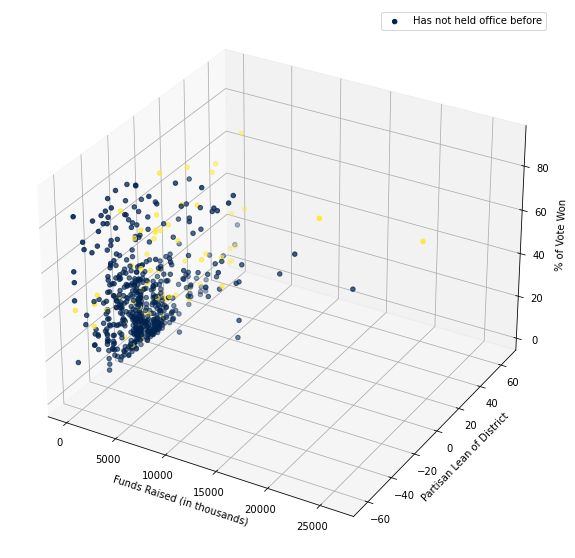

In [21]:
fig = plt.figure()
plt.figure(figsize = (15,10))
ax = plt.axes(projection = "3d")
ax.scatter(allreps["Funds"],allreps["Partisan Lean"], allreps["Primary %"], "o", c = allreps["Past Service"], cmap = "cividis")
plt.ylabel("Partisan Lean of District")
plt.xlabel("Funds Raised (in thousands)")
plt.legend(["Has not held office before"])
ax.set_zlabel("% of Vote Won")

Since this is hard to visualize given the different scales, the subplots below show the variables as they separately relate to the vote won. We will not plot the condition of past service as it is a categorical variable we replaced with a dummy variable for the purpose of regression and the plot will not reflect the true impact that the variable has on the outcome.

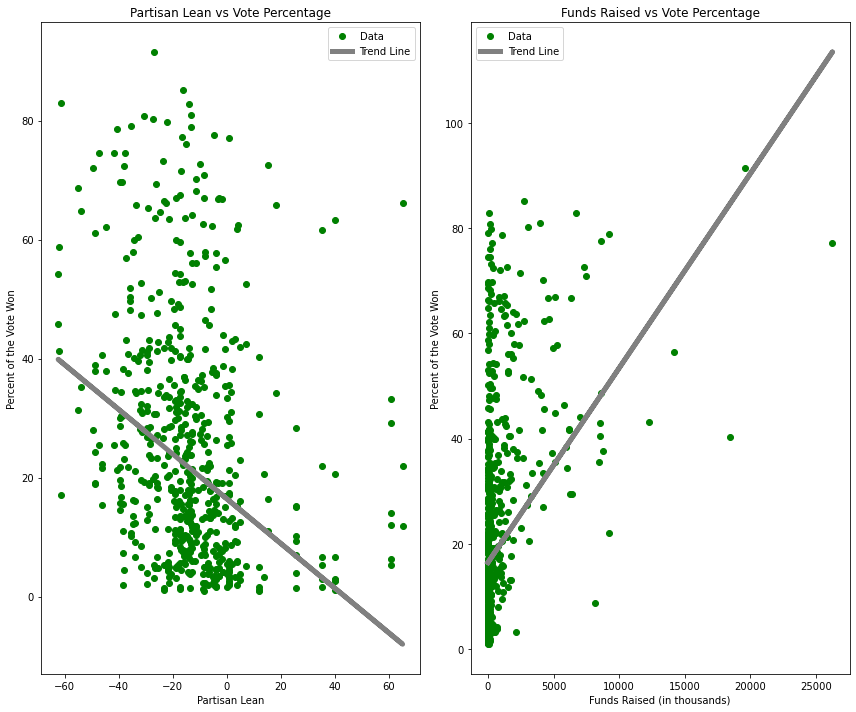

In [22]:
plt.figure(figsize = (12,10))
plt.subplot(121)
plt.plot(allreps["Partisan Lean"], allreps["Primary %"], "go")
plt.plot(allreps["Partisan Lean"], model_fitted.params[1]*allreps["Partisan Lean"] + model_fitted.params[0] ,"grey", lw =5)
plt.xlabel("Partisan Lean")
plt.ylabel("Percent of the Vote Won")
plt.title("Partisan Lean vs Vote Percentage")
plt.legend(["Data", "Trend Line"])
plt.subplot(122)
plt.plot(allreps["Funds"], allreps["Primary %"], "go")
plt.plot(allreps["Funds"], model_fitted.params[3]*allreps["Funds"] + model_fitted.params[0] ,"grey", lw=5)
plt.xlabel("Funds Raised (in thousands)")
plt.ylabel("Percent of the Vote Won")
plt.title("Funds Raised vs Vote Percentage")
plt.legend(["Data", "Trend Line"])
plt.tight_layout()

These plots reveal something very important about the data: that it is very nonlinear with very weak correlations. With the addition of the trend lines, we can see the loose relationship between the two, a positive relation for funds raised and a negative one for partisan lean, but it is loose. This means that any correlation made by our regression can only be taken as a suggestion.

### 3.2 Comparisons

In [23]:
print("Overall:", fitted_params[0], "R^2:", model_fitted.rsquared)
print("Senators:" ,fitted_params[1], "R^2:", sen_fitted.rsquared)
print("House Reps:", fitted_params[2], "R^2:", rep_fitted.rsquared)
#Constant, Partisan lean, Race, LGBT, Veteran, Past Service, Funds

Overall: [16.432, -0.375, 0, 0, 0, 12.494, 0.004] R^2: 0.28152402767800777
Senators: [2.599, -0.569, 0, 0, -15.701, 19.017, 0.002] R^2: 0.8638208485312847
House Reps: [16.025, -0.392, 0, 0, 0, 13.894, 0.004] R^2: 0.2765002374031068


The parameters for each dataset are shown above. The parameters for the House Representatives are very similar to those of the overall dataset, which makes sense due to the fact that House candidates make up a considerably larger portion of the dataset over the Senate candidates. The Senator parameters are considerably different with partisan lean and funds raised both having nearly double the effect on Senate candidates than Representatives and the addition of a parameter for Veteran status. We can visualize the difference in the plots of the separate variables below.

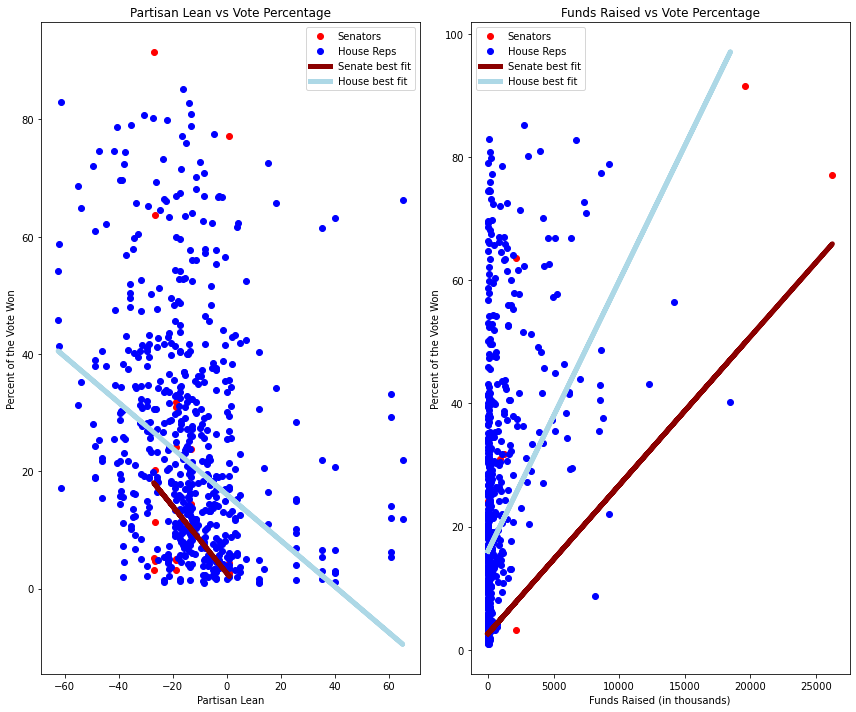

In [24]:
plt.figure(figsize = (12,10))
plt.subplot(121)
plt.plot(sen["Partisan Lean"], sen["Primary %"], "ro")
plt.plot(rep["Partisan Lean"], rep["Primary %"], "bo")
plt.plot(sen["Partisan Lean"], sen_fitted.params[1]*sen["Partisan Lean"] + sen_fitted.params[0] ,"darkred", lw= 5)
plt.plot(rep["Partisan Lean"], rep_fitted.params[1]*rep["Partisan Lean"] + rep_fitted.params[0] ,"lightblue", lw =5)
plt.xlabel("Partisan Lean")
plt.ylabel("Percent of the Vote Won")
plt.title("Partisan Lean vs Vote Percentage")
plt.legend(["Senators", "House Reps", "Senate best fit", "House best fit"])
plt.subplot(122)
plt.plot(sen["Funds"], sen["Primary %"], "ro")
plt.plot(rep["Funds"], rep["Primary %"], "bo")
plt.plot(sen["Funds"], sen_fitted.params[4]*sen["Funds"] + sen_fitted.params[0] ,"darkred", lw= 5)
plt.plot(rep["Funds"], rep_fitted.params[3]*rep["Funds"] + rep_fitted.params[0] ,"lightblue", lw =5)
plt.xlabel("Funds Raised (in thousands)")
plt.ylabel("Percent of the Vote Won")
plt.title("Funds Raised vs Vote Percentage")
plt.legend(["Senators", "House Reps", "Senate best fit", "House best fit"])
plt.tight_layout()

There are a notably fewer amount of Senator data points that tend to get lost among the Representatives but when we highlight the different points, we can see the difference in the trends between the types of office. But overall, the most important observation is that neither subset has linear data, so we must proceed with caution considering our regression. The data looks even more scattered in a 3D plot reflecting on funding, partisan lean, and the winning percentage. This shows that our data has a very weak correlation, and that our regression should only be used for analysis rather than any further interpolating or extrapolating.

Text(0.0935927996572016, 0.012539057542757442, '% of Vote Won')

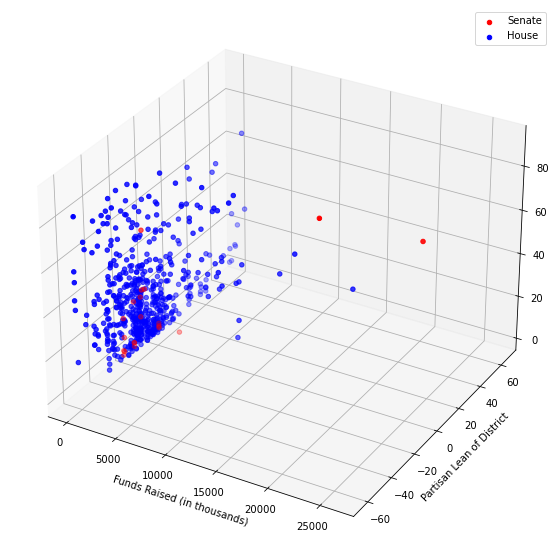

In [25]:
plt.figure(figsize=(15,10))
ax2 = plt.axes(projection = "3d")
ax2.scatter(sen["Funds"],sen["Partisan Lean"], sen["Primary %"], "o", c = "r")
ax2.scatter(rep["Funds"], rep["Partisan Lean"], rep["Primary %"], "o", c = "b")
plt.ylabel("Partisan Lean of District")
plt.xlabel("Funds Raised (in thousands)")
plt.legend(["Senate", "House"])
ax.set_zlabel("% of Vote Won")

## Discussion and Conclusion

So in the end, we can conclude that:
- For every increase of 1 unit of partisan lean in a district, a candidate's expected percent of the vote will decrease by 0.375%.
- For every increase of $1000 raised, a candidate's expected percent of the vote will increase 0.004%.
- If a candidate has previously held office, there is an expected increase of 12.5% 
- If those variables are 0 (no funds raised, equally partisan district, and no history of office), a candidate is still expected to win approximately 16.4% of the vote.
- Race, Veteran status, and LGBTQ identity do not have a significant impact on the percent of the vote won.

These reflect known phenomenon: candidates that raise more money are more likely to win and more partisan districts yield more competitive candidates in the opposite party. We have excluded imcumbents from this dataset so it makes sense that Democratic-held districts (districts with positive partisan leans) will have smaller candidates with less of the vote. On the other hand, in Republican-held districts (negative partisan values), voters are more likely to rally behind one strong candidate to beat the imcumbent.Finally, candidates that have previously held office are typically deemed more competant among voters and are more likely to win higher elections.

These trends hold between the different Congressional races. Between the Senate and House races, we can see:
- For every increase of 1 unit in a district's partisan lean, a House candidate's expected percent of the vote will decrease by 0.392% and a corresponding Senate candidate's percent will decrease by 0.569%
- For every increase of $1000 dollars raised, a House candidate's percent will increase by 0.004% and a Senate candidate's will increase by 0.002%
- If a House candidate has previously held office, they are expected to win about 13.9% of the vote while a Senate candidate is expected to win about 19.0% more.
- If a Senate candidate has advertised that they are a veteran, they are expected to win 15.7% less of the vote.
- If those variables are 0 (no funds raised, equally partisan district, and no history of office), a House candidate is expected to still receieve 16.0% of the vote while a Senate candidate will receive 2.6% of the vote.
- Race, Veteran status, and LGBTQ identity do not have a significant impact on the percent of the vote won for House candidates and race and LGBTQ identity do not have a significant impact for Senate candidates.

As previously stated, the trends for the House candidates resemble the overall trends very closely because there are considerably more House than Senate candidates in the dataset due to the number of districts up for election in 2018. Considering that higher coefficients have a greater impact on the general trend, we can see that the most influential factors differ between the two chambers of Congress. Funding matters slightly more to Representatives than Senators, likely because Representatives have more competitors and more hands-on campaigns. On the other hand, past service (both in political office and in the military) are more important for Senate candidates, but in different ways. Senators serve longer terms than House Representatives and typically go for re-election more often, so past service is important, but Republican candidates and voters are more likely to be veterans and military force is not traditionally a Democratic party ideal (6), so veteran status might be a detractor.

However, we cannot use this data to make predictions about ideal candidates. To start, many of these factors are out of the control of the candidates, as candidates cannot choose their own race or the partisan lean of their district, so there is no strategical gain to changing a campaign based on any of these factors. Second, many of the data readings suggest multicollinearity, where two or more of our independent variables are not actaully independent of each other, which is a reminder that we cannot prove causation for any of these variables. For example, are these candidates winning because they raised more money or does the money raised reflect that the candidate is more popular among the people and win the vote that way? From this dataset, we can only say that winning candidates tend to raise a greater amount of money. This does explain of our trends from the Senate candidates where funding does not matter as much but past office does. Perhaps funding does not matter because those candidates already have the free press from holding office before. We do not know for sure which variables are linked in this way, but it can explain some of the connections. Finally, the correlations within our data are all very weak. The dataset is large enough that any scatter plot we create will not show a clear linear relation, and our regression handles that to the best of its ability, but the resulting coefficients of determination are relatively low. This means that there is something missing in our correlation, which is probably the biggest and hardest to measure difference between candidates, policy. So from our regression, we can conclude that while funding, partisan lean, and past service are the most influential factors and that winning Senate and House candidates possess slightly different traits, the greatest factors in election success are policy decisions and connections with the voters.

Furthermore, this study is limited to this election only. The greatest limitation of this research is the data we are working with is very specific. Knowing these models are capable of analyzing election trends, it may be beneficial to expand our view to look at trends over time to see if variable significance has changed. Also, we only have access to the personal data of Democratic candidates but there are likely to be notable differences in regressions for Democratic and Republican candidates, but the data was not availible. It would be interesting to analyze the differences in what factors each party deems more important. For future inquiries, there are other factors that this method could be expanded to test significance. Gender, years in office, and endorsements are all potential variables that affect primary election outcomes but the data was not availible for this study. Additionally, the scale could be increased to examine national elections or even decreased for more local elections. 

### References

1. M. (n.d.). It’s not just 2020: U.S. presidential elections have long featured close state races. Pew Research Center. Retrieved April 6, 2021, from https://www.pewresearch.org/fact-tank/2020/12/04/its-not-just-2020-u-s-presidential-elections-have-long-featured-close-state-races/

2. Conroy, M. (2018, August 10). We researched hundreds of races. Here’s who democrats are nominating. FiveThirtyEight. https://fivethirtyeight.com/features/democrats-primaries-candidates-demographics/

3. Browse data. (n.d.). FEC.Gov. Retrieved April 6, 2021, from https://www.fec.gov/data/browse-data/

4. United states senate democratic party primaries, 2018. (n.d.). Ballotpedia. Retrieved April 6, 2021, from https://ballotpedia.org/United_States_Senate_Democratic_Party_primaries,_2018

5. Ordinary Least Squares — statsmodels. Retrieved April 13, 2021 from  https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

6. Clement, S. (n.d.). Veterans are voting Republican. And that’s not likely to change. Washington Post. Retrieved April 15, 2021, from https://www.washingtonpost.com/news/the-fix/wp/2014/11/11/veterans-are-voting-republican-and-thats-not-likely-to-change/